In [37]:
import torch
import pandas as pd
import numpy as np
import librosa
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader
from customDatasets.audioDataset import AudioDataset

def set_seed(seed = 42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

CONFIG = {
    "seed": 42,
    "epochs": 1,
    "num_classes": 2,
    "learning_rate": 0.001,
    "train_batch_size": 32,
    "val_batch_size": 128,
    "device":
        torch.device(
            "cuda:0" if torch.cuda.is_available()
            else "mps" if torch.backends.mps.is_available()
            else "cpu"
        )
}

set_seed(CONFIG['seed'])

data_path = "./data/train/"

meta_train_df = pd.read_csv("./data/train.csv")

train_df = meta_train_df[['filename', 'is_normal', 'machine_id']]
num_unique_values = train_df['is_normal'].nunique()

print(train_df.head())
print(f"\n#####\n\nNumber of different is_normal's values: {num_unique_values}")

train_ds = AudioDataset(train_df, data_path)

train_ds.__getitem__(0)

train_ds.with_filename = True
num_items = len(train_ds)
num_train = round(num_items * 0.7)
num_val = round(num_items * 0.2)
num_test = round(num_items * 0.1)

# TODO: do we have to do this or for test we use data in test folder? Probably don't need to do it now
train_ds, val_ds, test_ds = random_split(train_ds, [num_train, num_val, num_test])

train_dl = DataLoader(train_ds, batch_size=CONFIG['train_batch_size'], shuffle=True)
val_dl = DataLoader(val_ds, batch_size=CONFIG['val_batch_size'], shuffle=False)

                    filename  is_normal  machine_id
0  normal_id_00_00000267.wav          1           0
1  normal_id_00_00000463.wav          1           0
2  normal_id_00_00000385.wav          1           0
3  normal_id_02_00000300.wav          1           2
4  normal_id_04_00000285.wav          1           4

#####

Number of different is_normal's values: 1


[tensor([[[[  5.5297,   6.4553,   4.5321,  ..., -18.3014, -19.2922, -18.6045],
          [-14.4981,  -6.7761,   3.1798,  ..., -29.1846, -27.9149, -27.6683],
          [ -1.9710,   0.5452,   1.5522,  ..., -28.2035, -29.5336, -27.7304],
          ...,
          [ -1.3939,   1.9499,   1.2561,  ..., -15.8943, -10.4576,  -5.3187],
          [-10.4681,  -2.0437,   2.0309,  ..., -14.9144,  -6.7024,  -6.1959],
          [ -7.3738,  -9.2343,  -1.3268,  ..., -13.7472,  -4.9787,  -4.7090]]],


        [[[ -9.7859,  -8.2674, -12.7609,  ..., -15.3923, -20.7024, -18.6701],
          [-15.5119,  -8.5436,  -5.1368,  ..., -17.8216, -15.6120, -19.0424],
          [-24.3261, -11.4003,  -5.0742,  ..., -15.1647, -16.8012, -21.1263],
          ...,
          [-14.9955, -14.3079,  -3.8282,  ..., -13.8870, -17.1548, -22.6073],
          [-19.6943, -13.9329, -17.2244,  ..., -13.8394, -17.5381, -21.8032],
          [-17.8837, -16.1143,  -8.9768,  ..., -15.8527, -18.4613, -20.7963]]],


        [[[-10.4967,  -9.

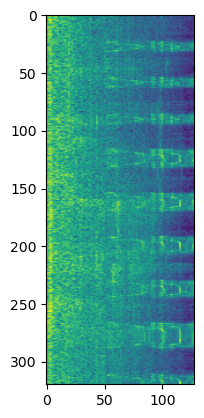

In [38]:
# take a sample from train_dl and plot it in 3d
sample = next(iter(train_dl))
frequencies=sample[0][0].numpy()
print(sample)
name=sample[2][0]
frequencies = frequencies.squeeze()
# grey
plt.imshow(frequencies)
print(name)

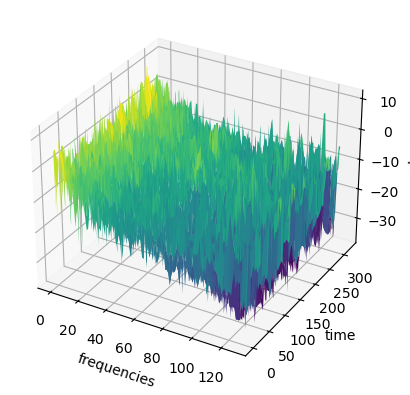

In [14]:
# Generate meshgrid for x and y coordinates
x = np.arange(frequencies.shape[0])
y = np.arange(frequencies.shape[1])
X, Y = np.meshgrid(x, y)

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot 3D surface
ax.plot_surface(Y, X, frequencies.T, cmap='viridis')  # Transpose frequencies to match X, Y shape

# Set labels
ax.set_xlabel('frequencies')
ax.set_ylabel('time')
ax.set_zlabel('value')

plt.show()

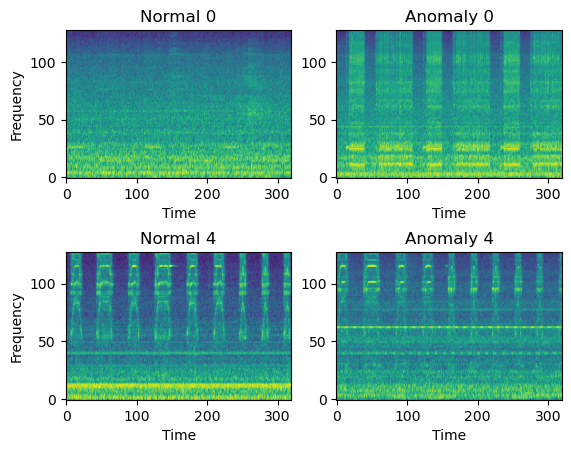

In [49]:
from utils.audioUtils import AudioUtil
from torchaudio import transforms
normal_audio = AudioUtil.open("/home/francesco/Desktop/EURECOM/AML/AML_Team42/Challenge_2/data/train/normal_id_00_00000000.wav")
anomaly_audio = AudioUtil.open("/home/francesco/Desktop/EURECOM/AML/AML_Team42/Challenge_2/data/test/anomaly_id_00_00000000.wav")

normal_audio_4 = AudioUtil.open("/home/francesco/Desktop/EURECOM/AML/AML_Team42/Challenge_2/data/train/normal_id_04_00000000.wav")
anomaly_audio_4 = AudioUtil.open("/home/francesco/Desktop/EURECOM/AML/AML_Team42/Challenge_2/data/test/anomaly_id_04_00000000.wav")

mel_normal_audio = AudioUtil.spectro_gram(normal_audio).squeeze()
mel_anomaly_audio = AudioUtil.spectro_gram(anomaly_audio).squeeze()

mel_normal_audio_4 = AudioUtil.spectro_gram(normal_audio_4).squeeze()
mel_anomaly_audio_4 = AudioUtil.spectro_gram(anomaly_audio_4).squeeze()

#plot the 4 spectrograms in 2x2 grid and with a colorbar for each one, with y axis inverted

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5)
axs[0, 0].imshow(mel_normal_audio, aspect='auto', origin='lower')
axs[0, 0].set_title('Normal 0')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlabel('Time')

axs[0, 1].imshow(mel_anomaly_audio, aspect='auto', origin='lower')
axs[0, 1].set_title('Anomaly 0')
axs[0, 1].set_xlabel('Time')

axs[1, 0].imshow(mel_normal_audio_4, aspect='auto', origin='lower')
axs[1, 0].set_title('Normal 4')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xlabel('Time')

axs[1, 1].imshow(mel_anomaly_audio_4, aspect='auto', origin='lower')
axs[1, 1].set_title('Anomaly 4')
axs[1, 1].set_xlabel('Time')

plt.show()












